## Product and Retail Data Analysis
https://www.kaggle.com/carrie1/ecommerce-data/downloads/ecommerce-data.zip/1

https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

About out Data
<ul>
<li> Company - UK-based and registered non-store online retail
<li> Products for selling - Mainly all-occasion gifts
<li> Customers - Most are wholesalers (local or international)
<li> Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)
    

## Imports

In [1]:
#Import our modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


import gc
import datetime

%matplotlib inline
#Using ggplot's style
plt.style.use("ggplot")



## Load Data

In [2]:
#Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip"
zipresp = urlopen(zipurl)
tempzip = open("tempfile.zip", "wb") # Create a new file on the hard drive
tempzip.write(zipresp.read()) # Write the contents of the downloaded file into the new file
tempzip.close() # Close the newly created file
zf = ZipFile("tempfile.zip") # Re-open the newly-created file with ZipFile()
zf.extractall(path='') # Extract its contents into <extraction_path>
zf.close() # Close the zipfile instance

df = pd.read_csv("ecommerce_data.csv", encoding = "ISO-8859-1")

In [3]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Check missing values for each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# Check the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


## Data Cleaning

In [7]:
#Change InvoiceDate format - String to Timestamp format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Create new dataframe without missing values
df_no_missing = df.dropna()

In [10]:
# Check missing values for each column
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# Change CustomerID type - Float to Int
df_no_missing["CustomerID"] = df_no_missing["CustomerID"].astype("int64")

In [12]:
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
# Rename dataframe to make code more readable
df2 = df_no_missing.copy()

In [14]:
df2.describe(include=["int64", "float64"]).round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


<AxesSubplot:xlabel='Quantity'>

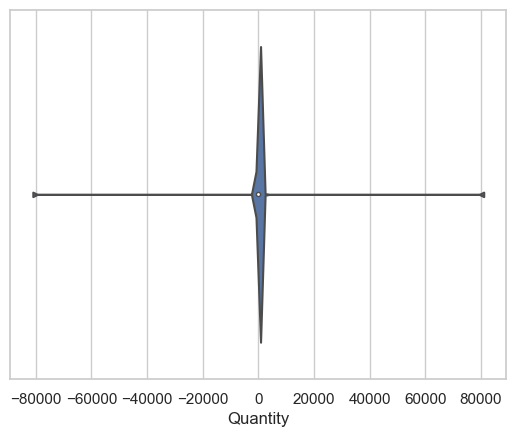

In [15]:
sns.set(style="whitegrid")
sns.violinplot(x=df2["Quantity"])

In [16]:
# Remove negative quantities
df2 = df2[df2["Quantity"] > 0]
df2.describe(include=["int64", "float64"]).round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


<AxesSubplot:xlabel='Quantity'>

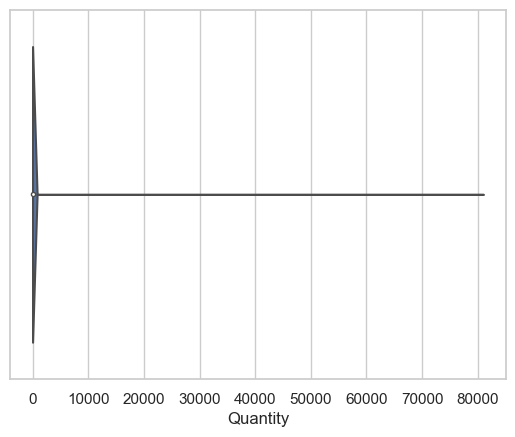

In [17]:
sns.violinplot(x=df2["Quantity"])

## Feature Engineering

In [18]:
# Create Amount Spent column
df2["AmountSpent"] = df2["Quantity"] * df2["UnitPrice"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [19]:
# Add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Year_Month First
df2['year_month'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [20]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2["InvoiceDate"].dt, i).rename(i) for i in L), axis=1))

In [21]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4


In [22]:
# Add a week of year column to the data
df2["weekofyear"] = df2["InvoiceDate"].apply(lambda x: x.isocalendar()[1])
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48


In [23]:
df2["dayofweek"].unique()

array([2, 3, 4, 6, 0, 1])

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   year_month   397924 non-null  period[M]     
 10  year         397924 non-null  int32         
 11  month        397924 non-null  int32         
 12  day          397924 non-null  int32         
 13  dayofweek    397924 non-null  int32         
 14  dayofyear    397924 non-null  int32         
 15  quarter      397924 non-null  int32    

In [25]:
# +1 to make Monday=1.....until Sunday=7
df2["dayofweek"] = df2["dayofweek"] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


## Explore and Analyse Data

In [26]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
sales_per_cust = df2.groupby(by=["CustomerID", "Country"], as_index=False)["InvoiceNo"].count().sort_values(by="InvoiceNo", ascending=False)
sales_per_cust.columns = ["CustomerID", "Country", "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


Text(0.5, 1.0, 'Number of Orders per Customer')

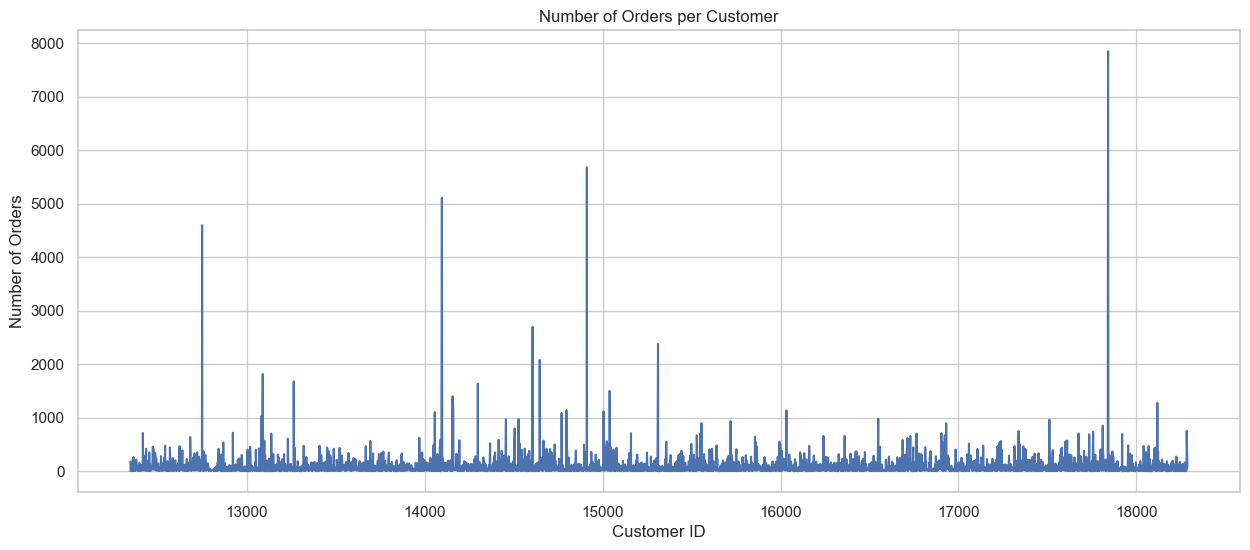

In [27]:
# Visualising number of sales for all customers

orders = df2.groupby(by=["CustomerID", "Country"], as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(15,6))
plt.plot(orders["CustomerID"], orders["InvoiceNo"])
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Customer")

Text(0.5, 1.0, 'Total Money Spent per Customer')

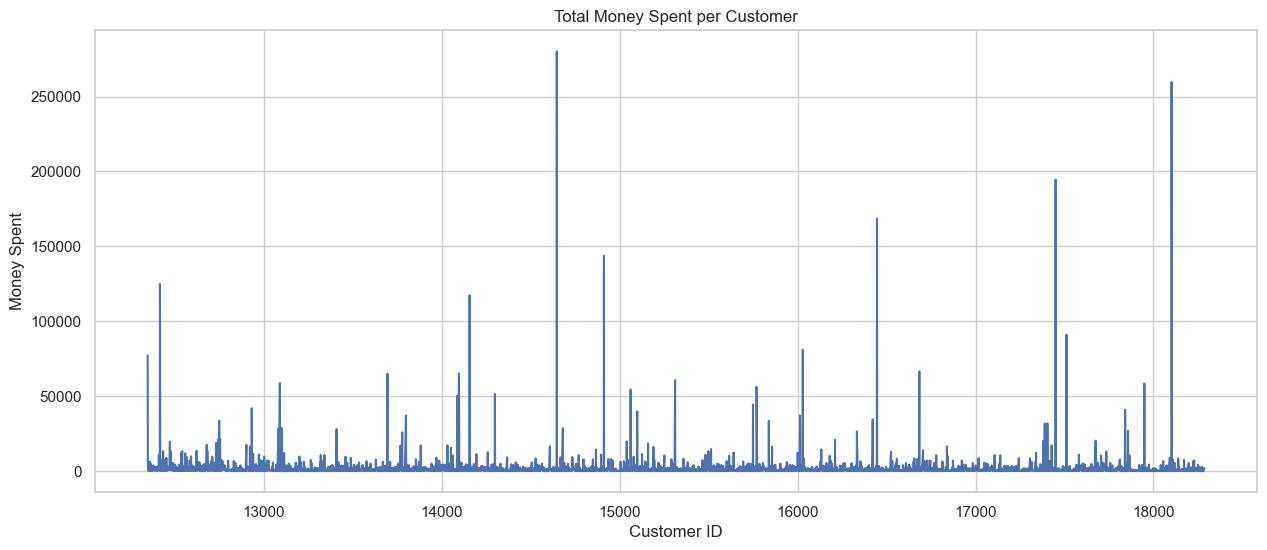

In [28]:
# Visualising money spent for all customers

money_spent = df2.groupby(by=["CustomerID", "Country"], as_index=False)["AmountSpent"].sum()
plt.figure(figsize=(15,6))
plt.plot(money_spent["CustomerID"], money_spent["AmountSpent"])
plt.xlabel("Customer ID")
plt.ylabel("Money Spent")
plt.title("Total Money Spent per Customer")

### Purchasing Patterns

In [29]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


In [30]:
# Insert a new column as our 14th column (index 13) with our Hour extracted from InvoiceDate
df2.insert(loc=13, column='hour', value=df2.InvoiceDate.dt.hour)

# Modify year_month column for further visualisation
df2["year_month"] = df2['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [31]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,hour,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010,12,1,8,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012,2010,12,1,8,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48


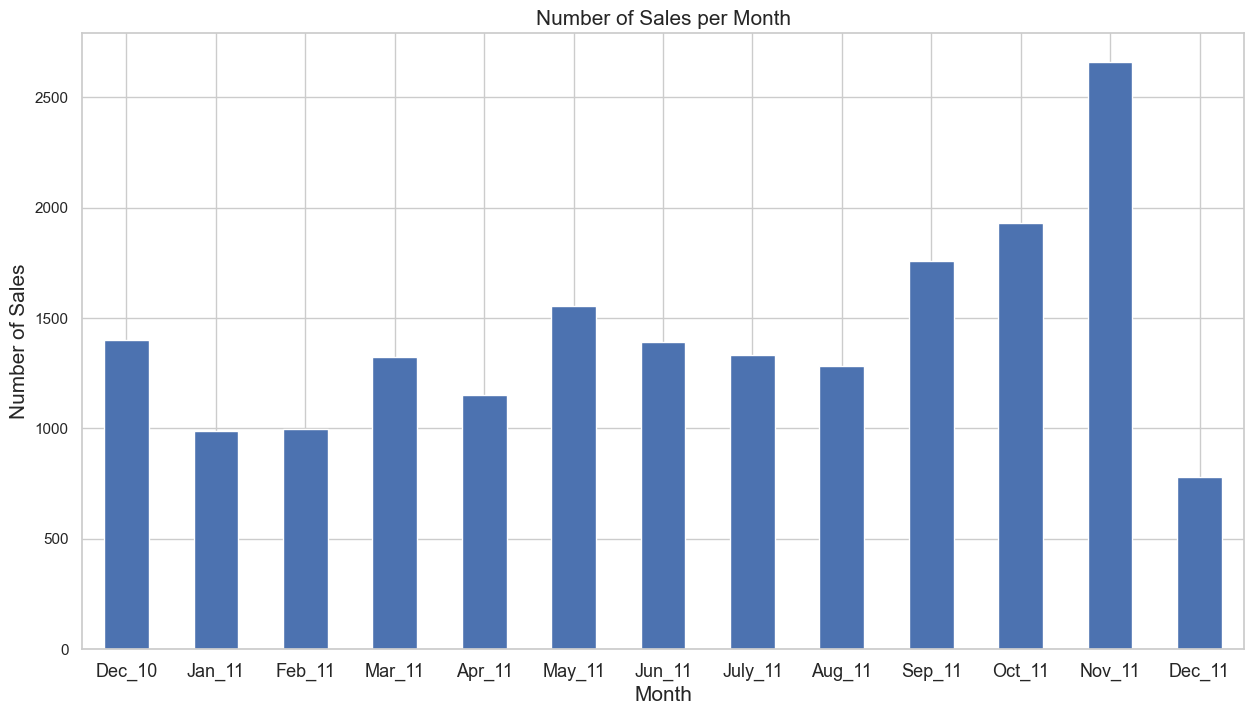

In [32]:
# Create a plot that shows the number of orders per month 
ax = df2.groupby("InvoiceNo")["year_month"].unique().value_counts().sort_index().plot(kind="bar", figsize=(15,8))
ax.set_xlabel("Month", fontsize=15)
ax.set_ylabel("Number of Sales", fontsize=15)
ax.set_title("Number of Sales per Month", fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

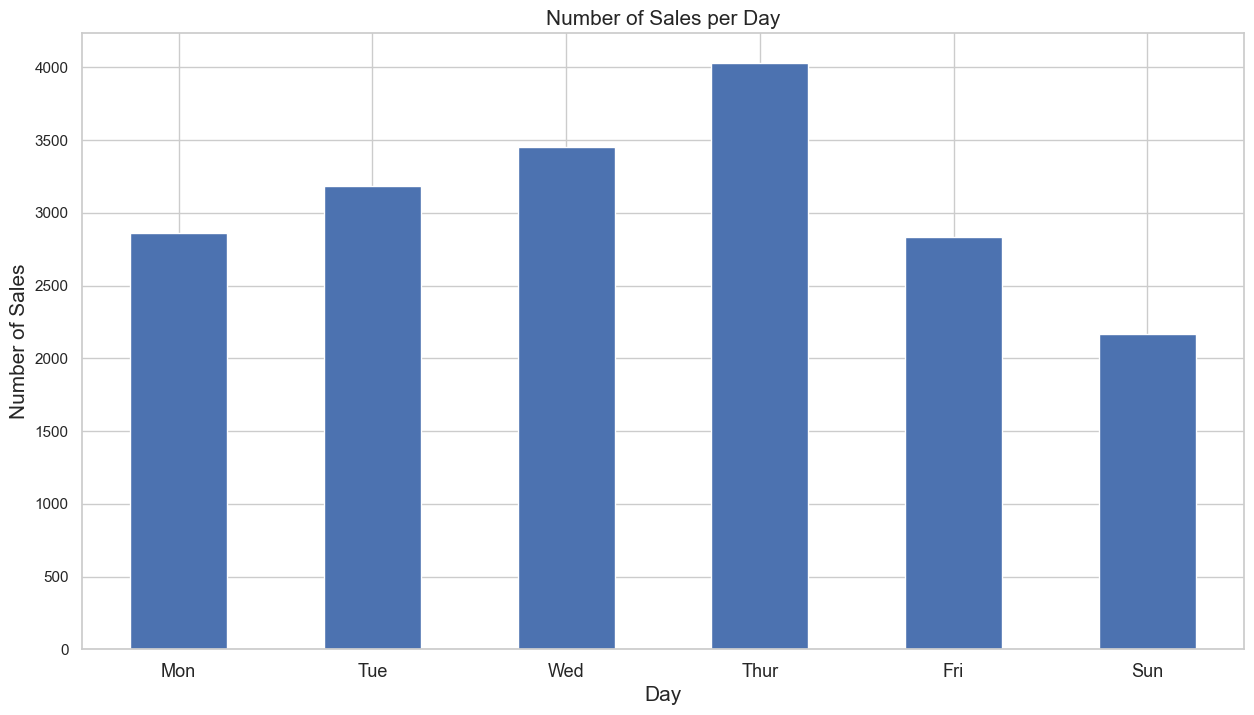

In [33]:
# Create a plot that shows number of sales per day of the week
ax = df2.groupby("InvoiceNo")["dayofweek"].unique().value_counts().sort_index().plot(kind="bar", figsize=(15,8))
ax.set_xlabel("Day", fontsize=15)
ax.set_ylabel("Number of Sales", fontsize=15)
ax.set_title("Number of Sales per Day", fontsize=15)
ax.set_xticklabels(("Mon", "Tue", "Wed", "Thur", "Fri", "Sun"), fontsize=13, rotation="horizontal")
plt.show()

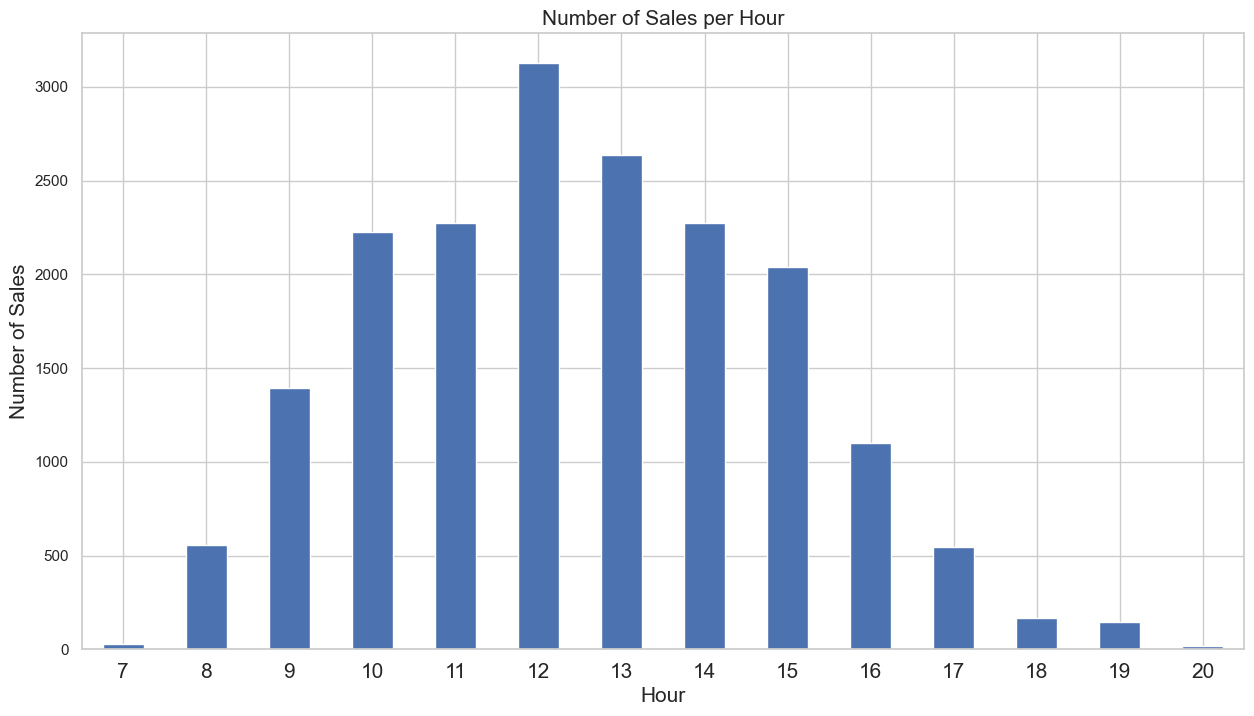

In [34]:
# Plot the number of sales per hour
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-2].sort_index().plot(kind="bar", figsize=(15,8))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Number of Sales", fontsize=15)
ax.set_title("Number of Sales per Hour", fontsize=15)
ax.set_xticklabels(range(7,21), fontsize=15, rotation="horizontal")
plt.show()

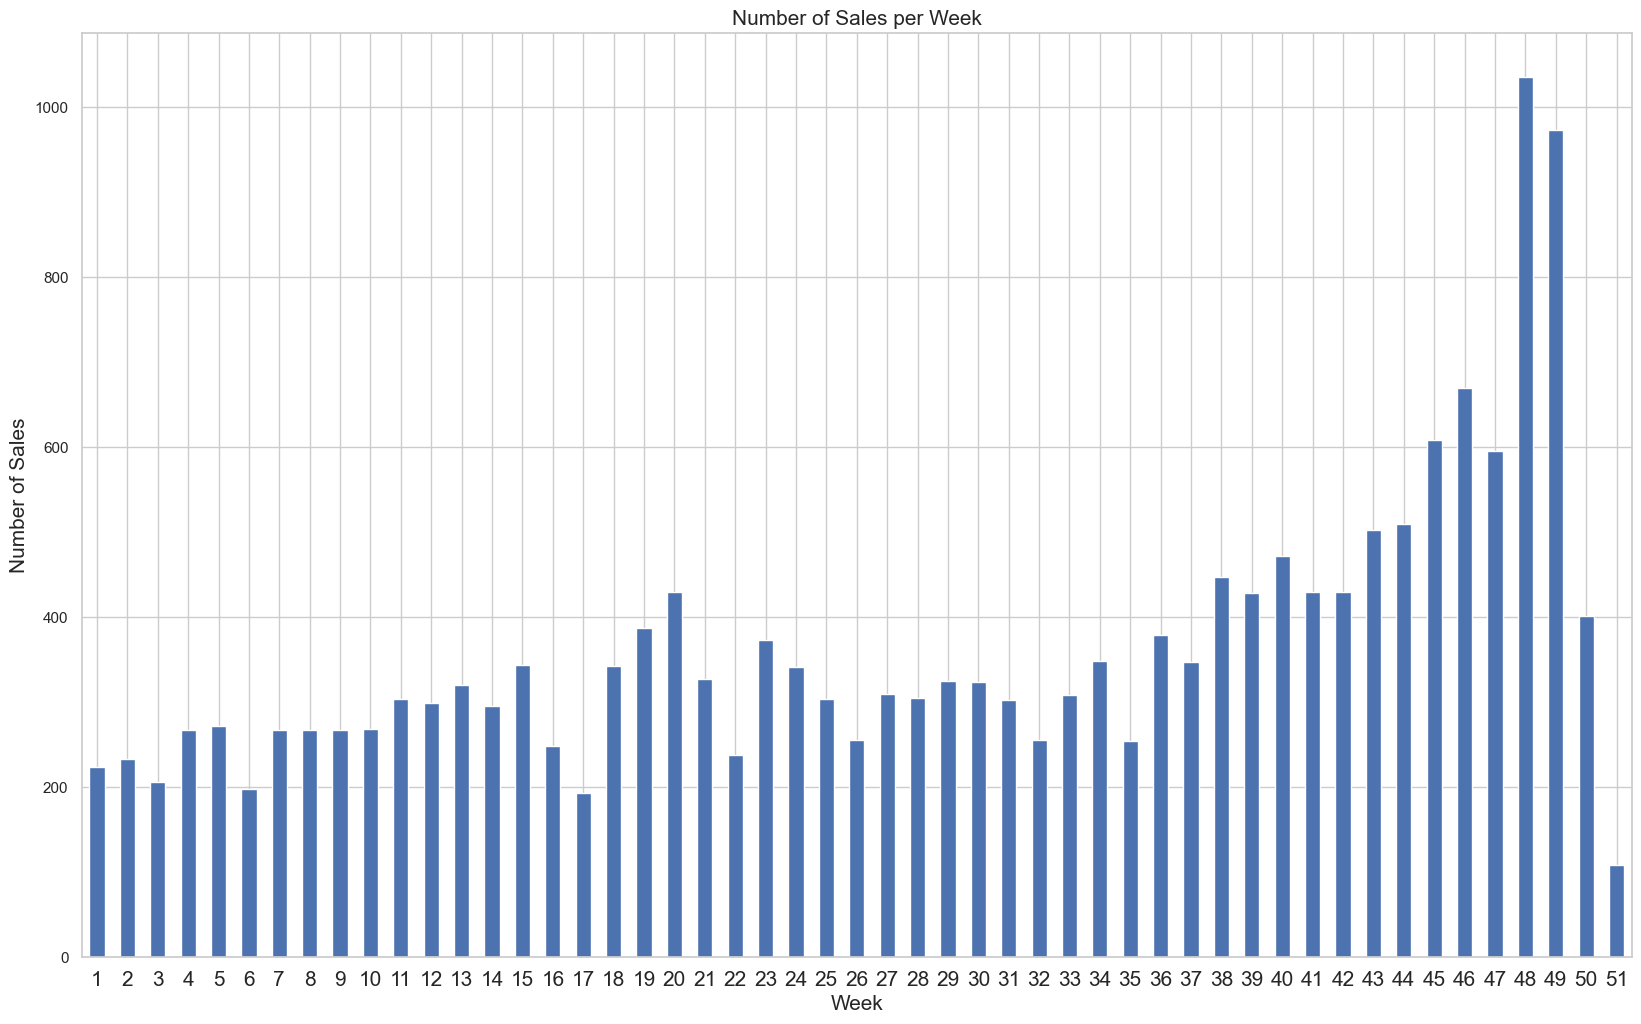

In [35]:
# Number of sales per week of the year
ax = df2.groupby("InvoiceNo")["weekofyear"].unique().value_counts().sort_index().plot(kind="bar", figsize=(20,12))
ax.set_xlabel("Week", fontsize=15)
ax.set_ylabel("Number of Sales", fontsize=15)
ax.set_title("Number of Sales per Week", fontsize=15)
ax.set_xticklabels(range(1,52), fontsize=15, rotation="horizontal")
plt.show()

### Analyse Unit Prices of Items

In [36]:
df2["UnitPrice"].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

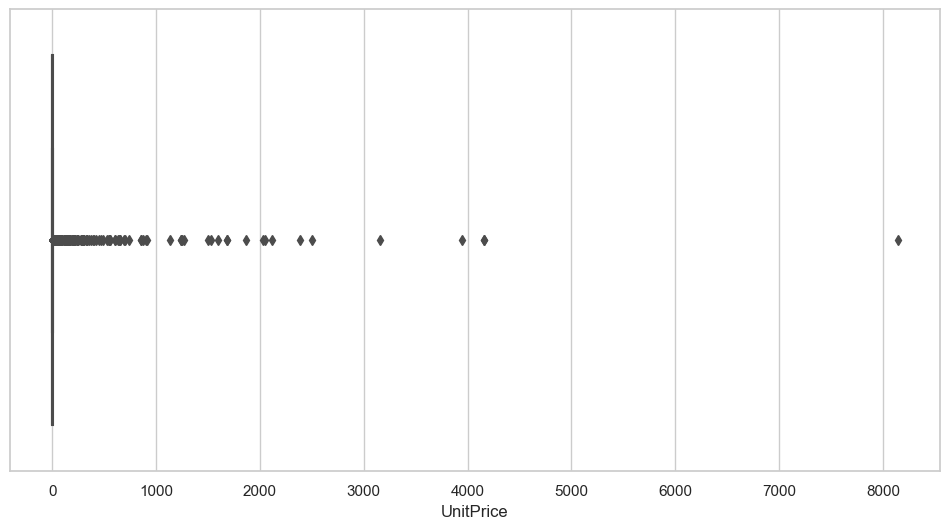

In [37]:
plt.subplots(figsize=(12,6))
sns.boxplot(df2["UnitPrice"])
plt.show()

In [38]:
# What are the free items?
df_free = df2[df2["UnitPrice"] == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,hour,dayofweek,dayofyear,quarter,weekofyear
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,201012,2010,12,5,14,7,339,4,48
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,201012,2010,12,16,14,4,350,4,50
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,201012,2010,12,21,13,2,355,4,51
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,201101,2011,1,6,16,4,6,1,1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,201101,2011,1,6,16,4,6,1,1


In [39]:
# Check when these free items were given out
df_free["year_month"].value_counts().sort_index()

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

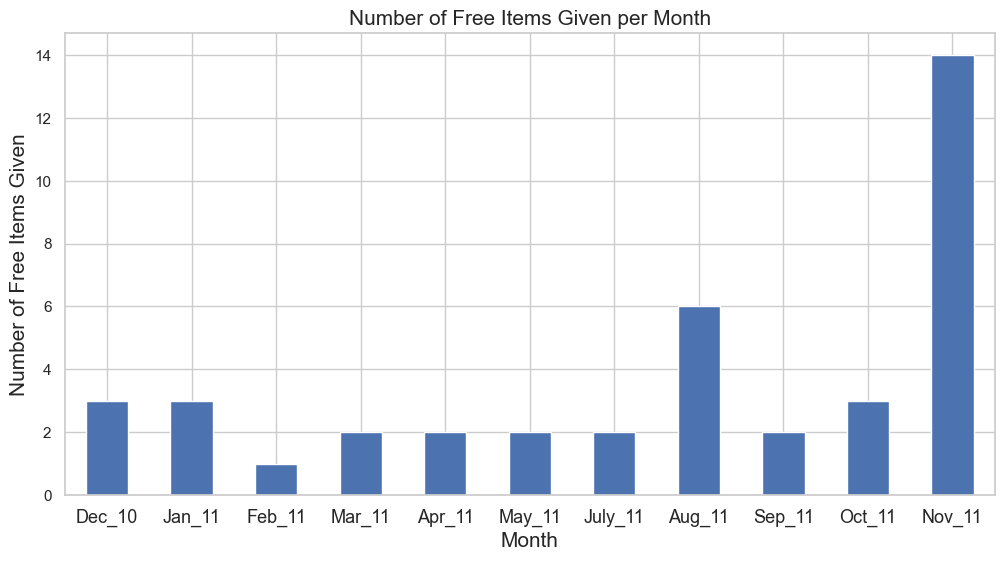

In [40]:
# Plotting the above data
ax = df_free["year_month"].value_counts().sort_index().plot(kind="bar", figsize=(12,6))
ax.set_xlabel("Month", fontsize=15)
ax.set_ylabel("Number of Free Items Given", fontsize=15)
ax.set_title("Number of Free Items Given per Month", fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

### Analysis Per Country

In [41]:
# Check countries
df2["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

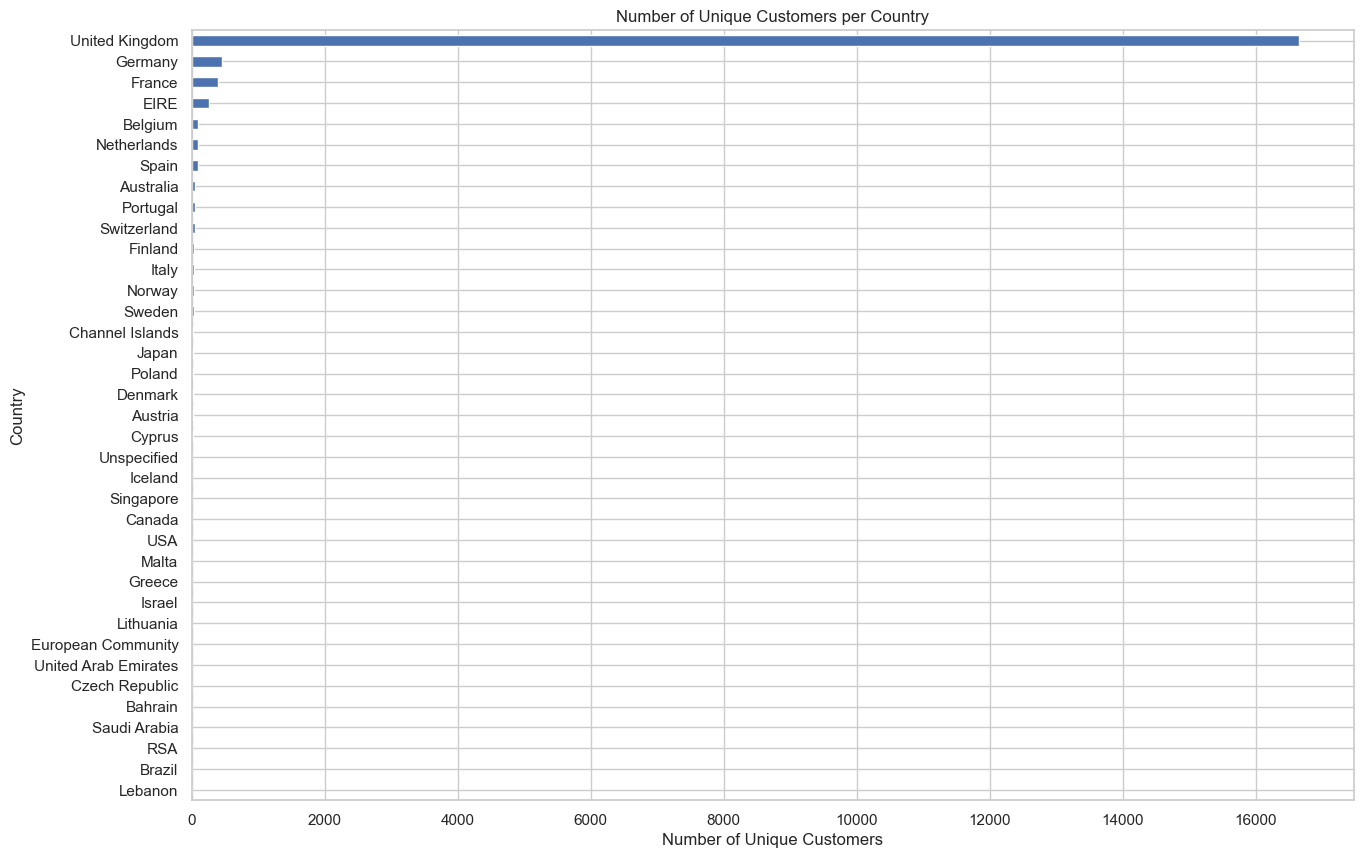

In [42]:
# Plot number of unique customers per country
ax = df2.groupby("Country")["InvoiceNo"].nunique().sort_values().plot(kind="barh", figsize=(15,10))
ax.set_xlabel("Number of Unique Customers", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.set_title("Number of Unique Customers per Country")
plt.show()

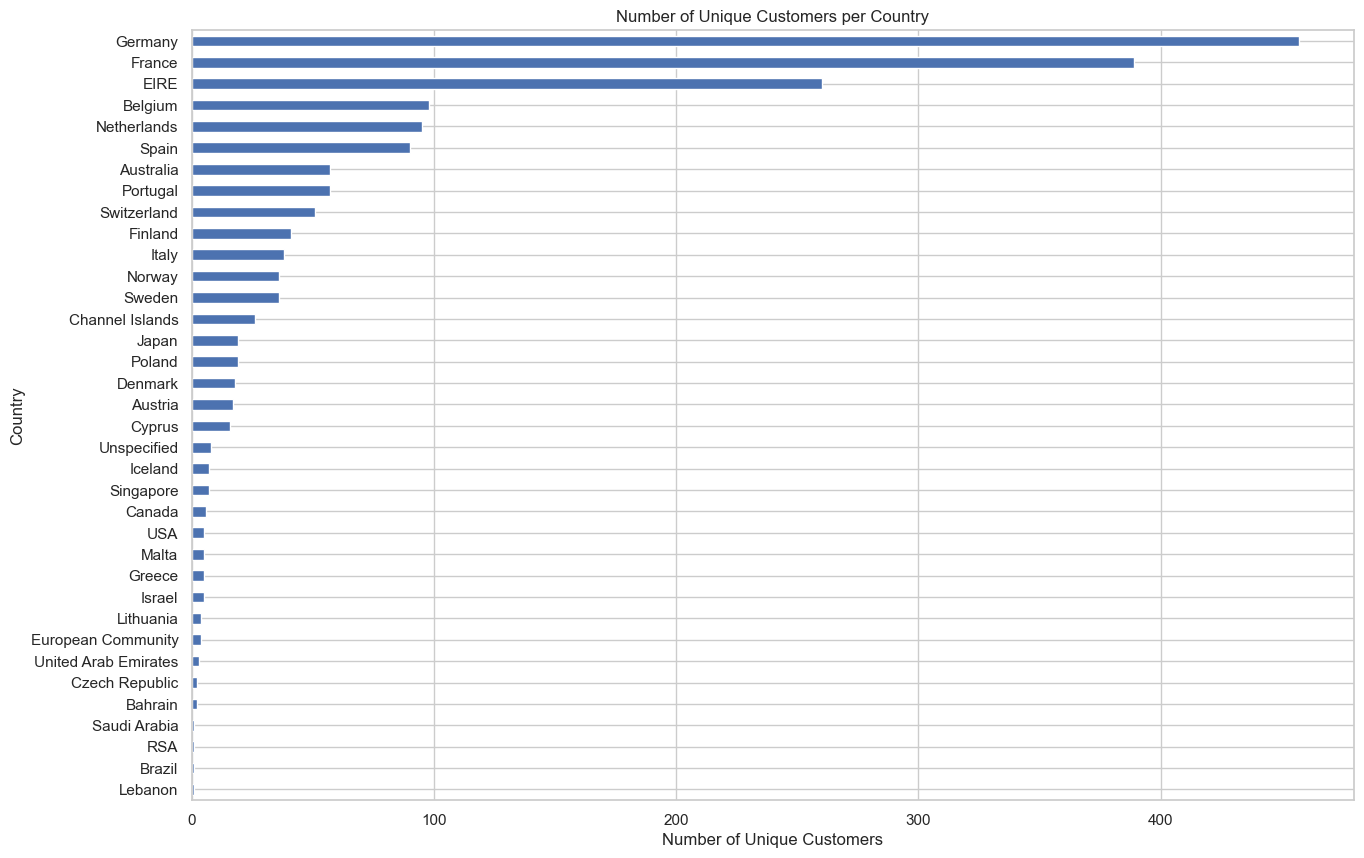

In [43]:
# Excluding UK now
group_country_orders = df2.groupby("Country")["InvoiceNo"].nunique().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk["United Kingdom"]

# Plot number of unique customers per country (without UK)
ax = group_country_orders_without_uk.plot(kind="barh", figsize=(15,10))
ax.set_xlabel("Number of Unique Customers", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.set_title("Number of Unique Customers per Country")
plt.show()

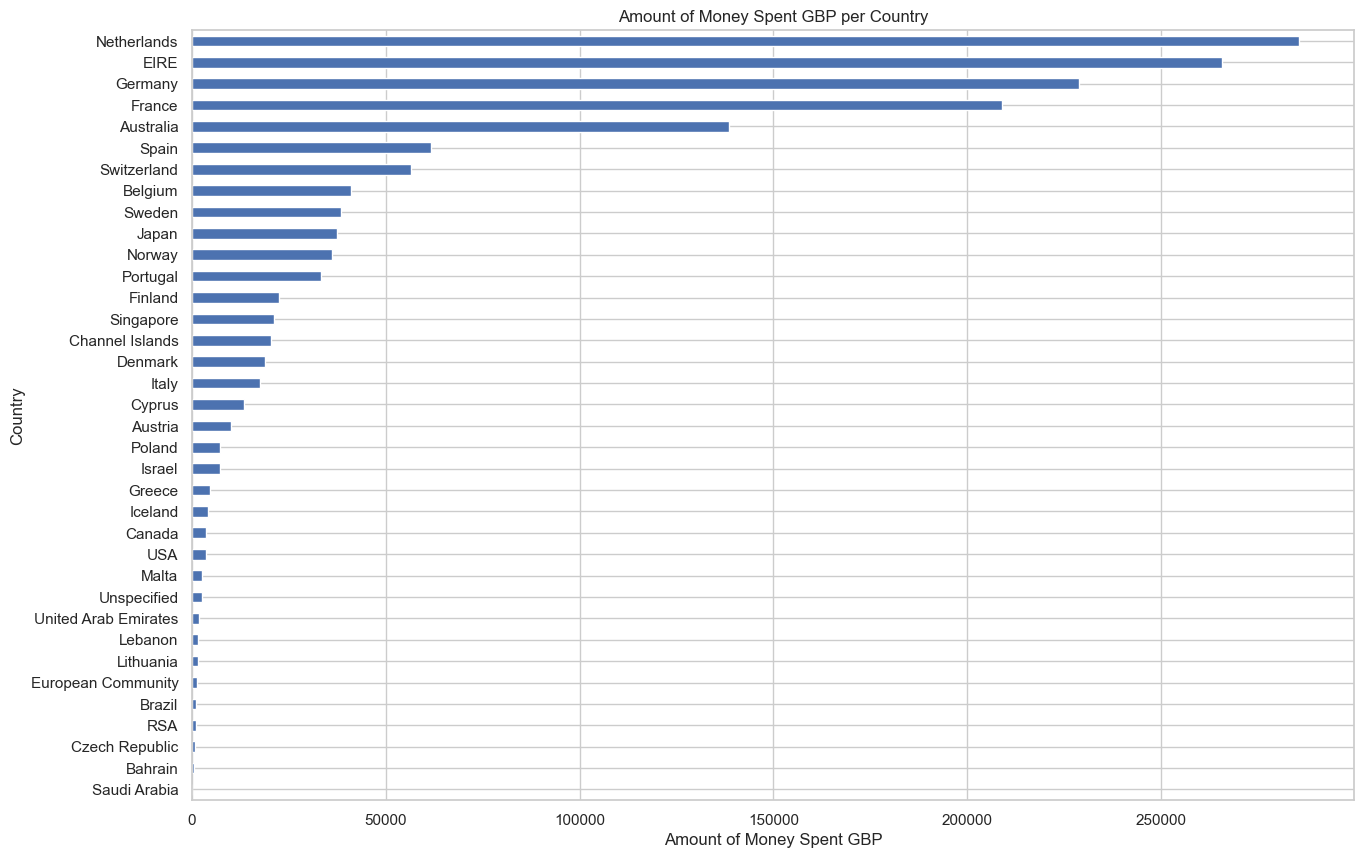

In [44]:
# Amount spent by each country (without UK)
group_country_spent = df2.groupby("Country")["AmountSpent"].sum().sort_values()
group_country_spent_without_uk = group_country_spent.copy()
del group_country_spent_without_uk["United Kingdom"]

# Plot amount spent by each country (without UK)
ax = group_country_spent_without_uk.plot(kind="barh", figsize=(15,10))
ax.set_xlabel("Amount of Money Spent GBP")
ax.set_ylabel("Country")
ax.set_title("Amount of Money Spent GBP per Country")
plt.show()

### Repeat Customers

In [45]:
# Get our date range for our data
print(f"Date Range: {df2['InvoiceDate'].min()} to {df2['InvoiceDate'].max()}")

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011
df2 = df2[df2["InvoiceDate"] < "2011-12-01"]

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [46]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,hour,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010,12,1,8,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012,2010,12,1,8,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010,12,1,8,3,335,4,48


In [47]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=["InvoiceNo", "InvoiceDate"]).agg({"AmountSpent":sum, "CustomerID":max, "Country":max}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [48]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index("InvoiceDate").groupby([
    
    pd.Grouper(freq="M"), "CustomerID"]).filter(lambda x : len(x) > 1).resample("M").nunique()["CustomerID"]

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [49]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [50]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

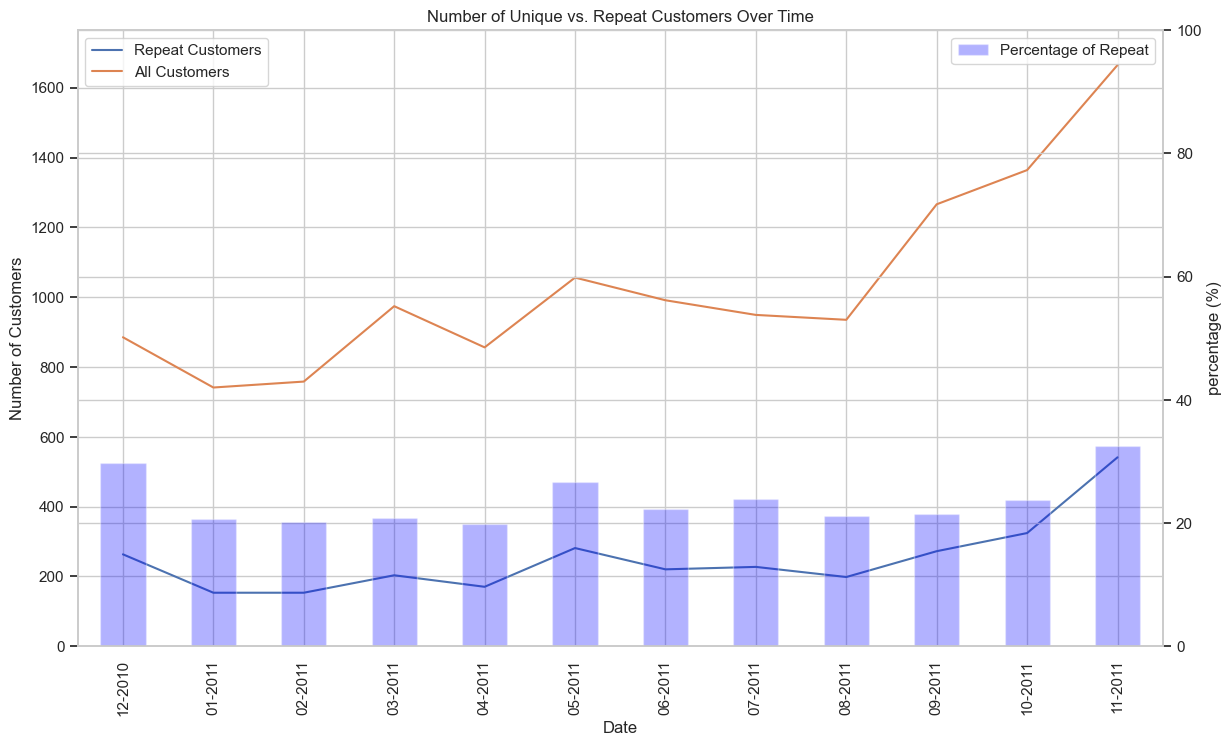

In [51]:
# Plotting this visually

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(14,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m-%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [70]:
# Investigate the relationship between repeat customers and revenue
monthly_revenue_df = df2.set_index("InvoiceDate")["AmountSpent"].resample("M").sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()["AmountSpent"]

# Get the percentage of revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

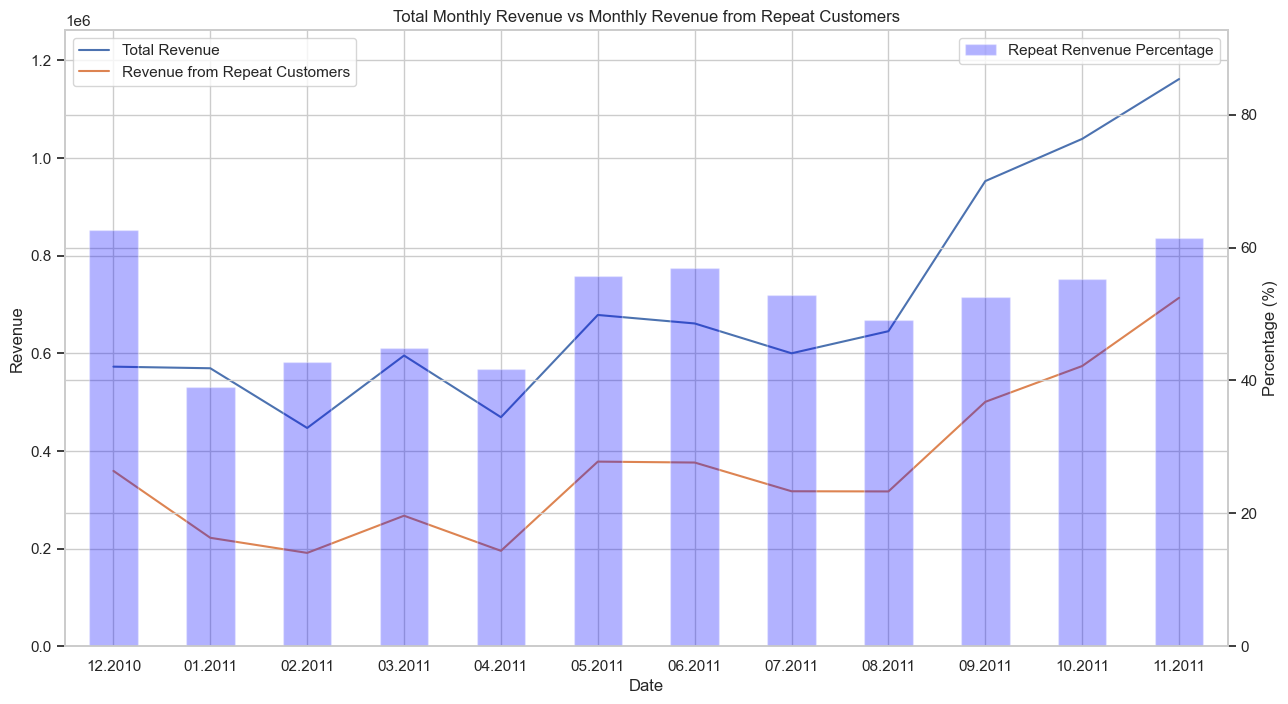

In [86]:
# Now let's plot the information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(15,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax, grid=True,)

ax.set_xlabel("Date")
ax.set_ylabel("Revenue")
ax.set_title("Total Monthly Revenue vs Monthly Revenue from Repeat Customers")

ax.legend(["Total Revenue", "Revenue from Repeat Customers"], loc="upper left")

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers.values).plot(ax=ax2, kind="bar", color="blue", alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel("Percentage (%)")
ax2.legend(["Repeat Renvenue Percentage"])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()


### Item Trends

Let's count the number of items sold for each product for each period.

In [95]:
# Now let's get quantity of each item sold per month
date_item_df = df2.set_index("InvoiceDate").groupby([pd.Grouper(freq="M"), "StockCode"])["Quantity"].sum()
date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [100]:
# Rank items by last month's sales
last_month_sorted_df = date_item_df.loc["2011-11-30"]
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by="Quantity", ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [101]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [134]:
# Now let's generate a monthly trend of each of the top 5 items
trending_items_df = date_item_df.reset_index()
trending_items_df = trending_items_df.pivot(columns="StockCode", index="InvoiceDate").fillna(0)
trending_items_df.columns = trending_items_df.columns.droplevel()
trending_items_df



StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


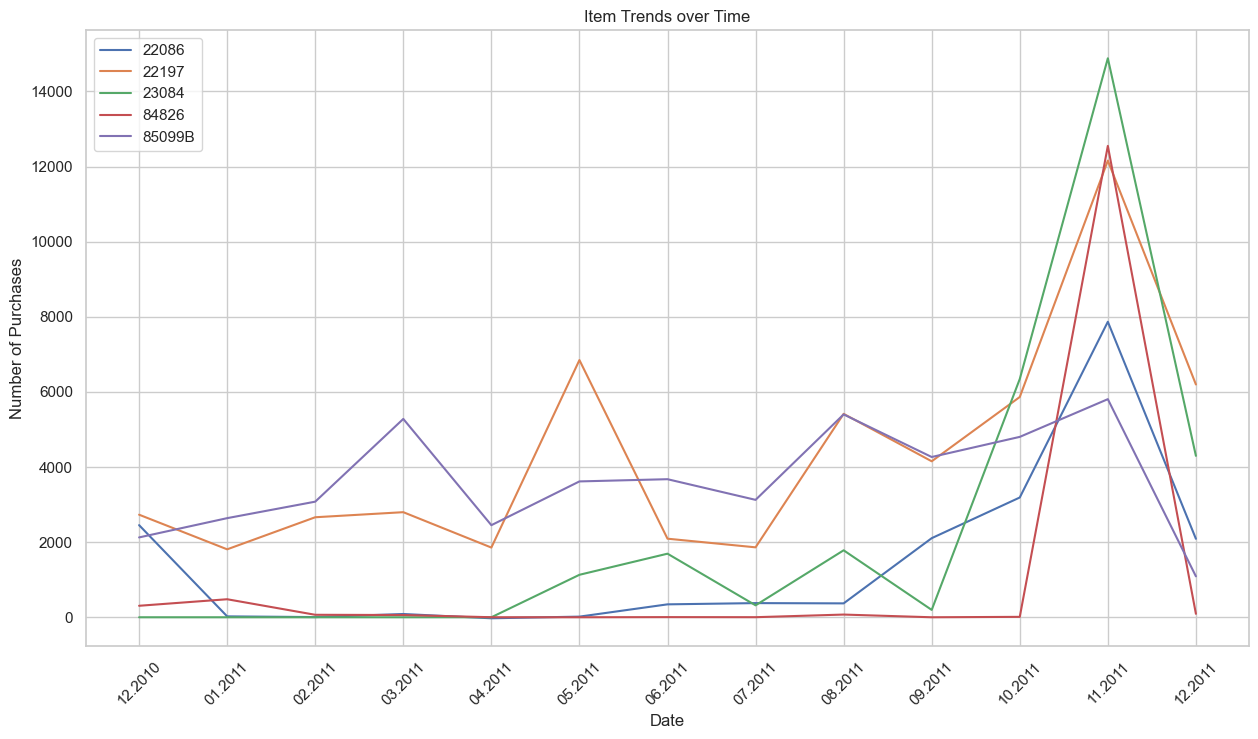

In [136]:
# Plot the above information
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(15,8), grid=True,)

ax.set_ylabel('Number of Purchases')
ax.set_xlabel('Date')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)

plt.show()